<a href="https://colab.research.google.com/github/yonatanlou/study_projects/blob/main/Statistics_lab/labs/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lab 6 - Matan Polke, Eitan Zimmerman, Yonatan Lourie

In [1]:
# !pip install bamboolib

In [2]:
# Import modules 
import numpy as np
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import statsmodels.api as sm
from functools import partialmethod


import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing

pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=10)

import random
random.seed(42)


pd.get_option("display.max_columns")

from IPython.display import display


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
parties_dict ={'אמת': 'עבודה',
 'ב': 'ימינה',
 'ג': 'יהדות התורה',
 'ודעם': 'הרשימה המשותפת',
 'ט': 'הציונות הדתית',
 'כן': 'כחול לבן',
 'ל': 'ישראל ביתנו',
 'מחל': 'הליכוד',
 'מרצ': 'מרצ',
 'עם': 'רעם',
 'פה': 'יש עתיד',
 'שס': 'שס',
 'ת': 'תקוה חדשה'}
##relevant 13 parties

In [4]:
data_url = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/Statistics_lab/votes_per_ballot_2021.csv"
votes_per_ballot = pd.read_csv(data_url,  encoding = 'iso-8859-8', index_col='שם ישוב')

df = votes_per_ballot
df = df.iloc[:,:-1]
df = df.loc[~df.index.str.fullmatch('מעטפות חיצוניות')]


extracting data

In [5]:
df = df.loc[~df.index.str.fullmatch('מעטפות חיצוניות')]
col_index = [6]+list(range(10,df.shape[1]))
df_model = df.iloc[:,col_index]

In [6]:
partiestranspoed = df.iloc[:,10:].T

In [7]:
parties = df.iloc[:,10:]


In [8]:
parties = pd.DataFrame(preprocessing.normalize(parties, axis=1), columns=parties.columns, index=parties.index)

##Q1


### 1A



In [9]:
party_names = parties.T.index.to_list()


In [10]:
# party_names- reversed for graph
res = [i[::-1] for i in party_names]


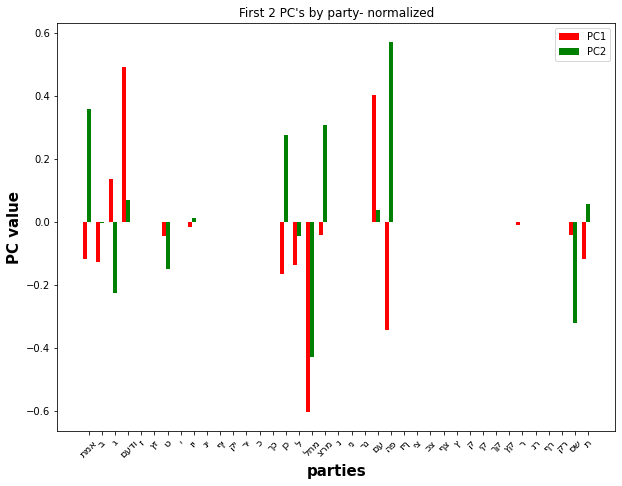

In [11]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(parties)

normalized_components = pd.DataFrame(preprocessing.normalize(pca.components_,axis=1),columns=parties.columns)

x = res 


y1 = normalized_components.loc[0]
y2 = normalized_components.loc[1]  

barWidth = 0.3
fig = plt.subplots(figsize =(10, 7.5))

# # Set position of bar on X axis
br1 = np.arange (len(y1))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, y1, color ='r', width = barWidth,label ="PC1")
plt.bar(br2, y2, color ='g', width = barWidth, label ="PC2")
plt.xlabel(('parties'), fontweight ='bold', fontsize = 15)
plt.ylabel(('PC value'), fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(y1))],x, rotation = 45)
plt.title(("First 2 PC's by party- normalized"))
plt.legend()


It is very noticable that the dominant partites for the first 2 PC's, are those who got enough votes to get in to the knesset. the other parties are too small to have infulnce in this graph(PC too low).
this makes perfect sense beacuse what the PC does is reduces to columns that effect the final result. 
We cansee another proof for that with the fact that the bigger the party is, the longer their bar's are here, we means higher PC value. 

### 1B

In [12]:
pca= PCA()
res = pca.fit_transform(parties)



Text(0.5, 1.0, 'Explained Variance PCA Components')

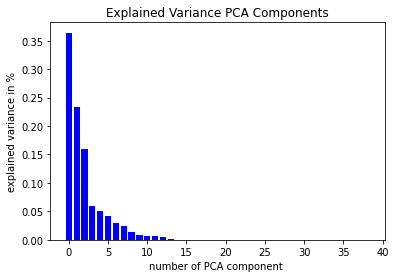

In [13]:
plt.bar(np.arange(39), pca.explained_variance_/pca.explained_variance_.sum(), color = "blue")
plt.ylabel('explained variance in %')
plt.xlabel('number of PCA component ')
plt.title("Explained Variance PCA Components")

Text(0.5, 1.0, 'Explained Variance PCA Components-Cumulative')

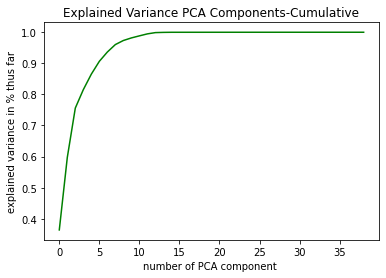

In [14]:
plt.plot(np.arange(39), np.cumsum(pca.explained_variance_)/pca.explained_variance_.sum(), color = "green")
plt.ylabel('explained variance in % thus far')
plt.xlabel('number of PCA component ')
plt.title("Explained Variance PCA Components-Cumulative")

Based on the graphs,I would reccommend to dimmension 8. we can see that after that the added variance is minimal.

##Q2

###data preperation

In [15]:
data_url = "https://raw.githubusercontent.com/yonatanlou/study_projects/main/Statistical_learning_and_data%20analysis/votes_per_city_2021.csv"
df_2021_raw = pd.read_csv(data_url, encoding = 'iso-8859-8', index_col='שם ישוב')


In [16]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

In [17]:
# # update the data with the parties above the  threshold
total_votes = parties_votes_percents(df_2021_raw.iloc[:,6:], 0.0325)  # total votes for each party
names = total_votes.keys()

df_2021 = df_2021_raw[names]
# df_2021

In [18]:
cities_to_remove = ['באר מילכה' , 'מעלה שומרון' , 'עמיחי' , 'פלך' , 'רותם']

In [19]:
df_2021 = df_2021.loc[~df_2021.index.str.fullmatch('מעטפות חיצוניות')]
df_2021 = df_2021.loc[~df_2021.index.str.fullmatch('רותם')]
df_2021 = df_2021.loc[~df_2021.index.str.fullmatch('פלך')]
df_2021 = df_2021.loc[~df_2021.index.str.fullmatch('עמיחי')]
df_2021 = df_2021.loc[~df_2021.index.str.fullmatch('מעלה שומרון')]
df_2021 = df_2021.loc[~df_2021.index.str.fullmatch('באר מילכה')]

In [20]:
df_2020_url = "https://github.com/matanp13/StatsLab/blob/main/votes%20per%20city%202020B.csv?raw=true"
df_2020_raw = pd.read_csv(df_2020_url ,encoding = 'iso-8859-8', index_col='שם ישוב')


In [21]:
total_votes = parties_votes_percents(df_2020_raw.iloc[:,6:], 0.0025)  # total votes for each party
# total_votes
names = total_votes.keys()
#names
df_2020B = df_2020_raw[names]
# df_2020B

In [22]:
df_2020Bnew = df_2020B


In [23]:
df_2020Bnew['אמת'] = df_2020B['אמת']/2
df_2020Bnew['מרצ'] = df_2020Bnew['אמת']
df_2020Bnew['עם'] = df_2020B['ודעם']*0.4
df_2020Bnew['ודעם'] = df_2020B['ודעם']*0.6
df_2020Bnew['ת'] = df_2020B['מחל']/6
df_2020Bnew['מחל'] = df_2020B['מחל']*5/6
df_2020Bnew['כן'] = df_2020B['פה']/3
df_2020Bnew['פה'] = df_2020B['פה']*2/3
df_2020Bnew['ב'] = df_2020B['טב']*0.6
df_2020Bnew['ט']= df_2020B['טב']*0.4

df_2020Bnew['ט'] =df_2020Bnew['ט'] + df_2020B['נץ']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [24]:
names_for_6 = [ 'מחל','פה' ,'שס','כן','ב','אמת','ג','ל','ט','ודעם','ת',  'מרצ', 'עם' ]

In [25]:
df_2020Bnew=df_2020Bnew.drop([ 'נץ','טב'], axis=1)


In [26]:
df_2020Bnew = df_2020Bnew.loc[~df_2020Bnew.index.str.fullmatch('מעטפות חיצוניות')]
df_2020Bnew = df_2020Bnew.loc[~df_2020Bnew.index.str.fullmatch('רותם')]
df_2020Bnew = df_2020Bnew.loc[~df_2020Bnew.index.str.fullmatch('פלך')]
df_2020Bnew = df_2020Bnew.loc[~df_2020Bnew.index.str.fullmatch('עמיחי')]
df_2020Bnew = df_2020Bnew.loc[~df_2020Bnew.index.str.fullmatch('מעלה שומרון')]
df_2020Bnew = df_2020Bnew.loc[~df_2020Bnew.index.str.fullmatch('באר מילכה')]


In [27]:
# df_2021 = pd.DataFrame(df_2021)
type(df_2020Bnew)
df_2021 = df_2021.sort_index()
df_2020Bnew = df_2020Bnew.sort_index()
# df_2020Bnew

In [28]:
df_2020Bnew = df_2020Bnew[names_for_6]##organize df with the same order of parties

In [29]:
result = pd.concat([df_2020Bnew,df_2021])#join data frames

working on the combined data frame- results sorted

###2A




In [30]:
resultsper = result.div(result.sum(axis=1),axis=0) 


In [31]:
resultsper

,מחל,פה,שס,כן,ב,אמת,ג,ל,ט,ודעם,ת,מרצ,עם
שם ישוב,,,,,,,,,,,,,
אבו גווייעד שבט,0.005727,0.009164,0.003436,0.004582,0.000000,0.011168,0.000000,0.001718,0.000000,0.571134,0.001145,0.011168,0.380756
אבו גוש,0.087522,0.030758,0.005251,0.015379,0.001125,0.014066,0.001500,0.001875,0.001875,0.485446,0.017504,0.014066,0.323631
אבו סנאן,0.026415,0.083639,0.041208,0.041820,0.001602,0.007674,0.001001,0.038372,0.001568,0.446246,0.005283,0.007674,0.297497
אבו עבדון שבט,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.400000
אבו קורינאת שבט,0.005070,0.016730,0.000000,0.008365,0.000456,0.003422,0.000000,0.000000,0.001065,0.576274,0.001014,0.003422,0.384183
...,...,...,...,...,...,...,...,...,...,...,...,...,...
תקומה,0.289340,0.058376,0.017766,0.053299,0.296954,0.032995,0.002538,0.002538,0.182741,0.000000,0.055838,0.007614,0.000000
תקוע,0.212378,0.022150,0.014332,0.017590,0.384365,0.021498,0.007818,0.018893,0.243648,0.000651,0.052117,0.004560,0.000000
תראבין אצאנע שבט,0.214286,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000


Data frame of two elections combined, with percentge of votes for each party in each city(by city)


###2B



In [32]:
result_names = result.index.to_list()

In [33]:
pca_components_2b = PCA(n_components=2).fit_transform(resultsper)

In [34]:
#color vector
blue_vector = ["blue"]*1211
red_vector = ["red"]*1211
col_vec = blue_vector+red_vector 

In [35]:
col_vec_for_legend = ["blue", "red"]

In [36]:
#from lab 2- prepare per size
multiplier = 0.0042769033204081122
#Need to deciede best multuplier- what looks better
# multiplier = 0.00045538066408162245
multiplier = multiplier * result.sum(axis=1) 


In [37]:
color_df = pd.DataFrame(pca_components_2b, col_vec, columns=[ "x", "y"])
color_df.reset_index(inplace=True)
# color_df

In [38]:
#year vector
blue_vector = [2020]*1211
red_vector = [2021]*1211
year_vec = blue_vector+red_vector

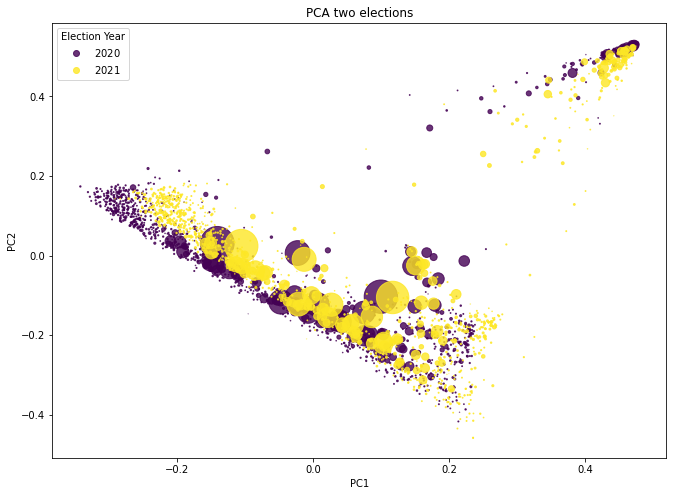

In [39]:
# plt.figure(figsize=(15,8))

fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

scatter = ax.scatter(color_df.x, color_df.y, c = year_vec, s=multiplier,alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA two elections')
legend = ax.legend(*scatter.legend_elements(), title="Election Year")

# plt.show()

we can see the the dots are scatters similar to a trinagle.
the purple "triangle" which represents 2020 seems higher and wider that the 2021 yellow triangle, that seems abit more "squeezed" or centered.

###2C


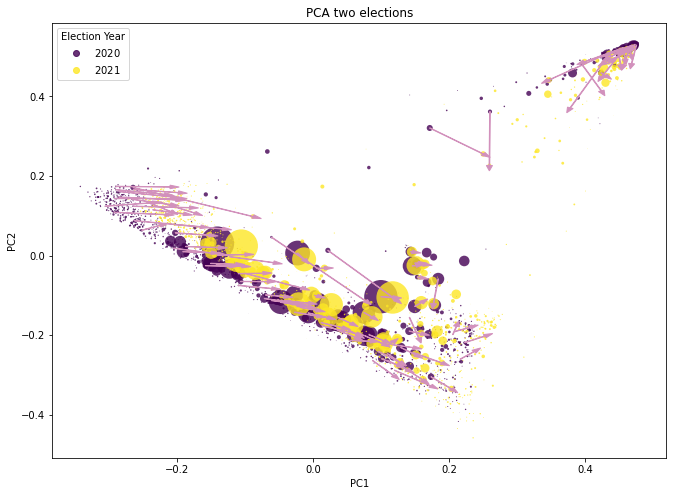

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

scatter = ax.scatter(color_df.x, color_df.y, c=year_vec, s=multiplier,alpha=0.8,edgecolors='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA two elections')
legend = ax.legend(*scatter.legend_elements(), title="Election Year")


index_list = [index for index, value in enumerate(list(df_2020_raw['בזב'])) if value >10000]
for i in index_list:
  d_x = pca_components_2b[i+1211,0] - pca_components_2b[i,0]
  d_y = pca_components_2b[i+1211,1] - pca_components_2b[i,1]
  plt.arrow(pca_components_2b[i,0],pca_components_2b[i,1],d_x,d_y,head_width = 0.009 ,color='#D291BC'   )


We can see that allmost all of the arrows driection is to the interior side of the traingle. the traingle of blue dots which is the 2020B elections is slightly bigger then the red  one that stands for 2021 elections.
 As we suspected after 2B, the arrows approove our feeling with the fact that allmost all of the arrows presented are towards inside of the triangle, which means results more condenced.



###2D


In [41]:
#sum of each row
df_2021_percent_per_city = df_2021.div(df_2021.sum(axis=1),axis=0)
df_2020B_percent_per_city = df_2020Bnew.div(df_2020Bnew.sum(axis=1),axis=0) 

In [42]:
# calculation of the differnce in eachcity between 2020B and 2021 elections 
dist = (df_2021_percent_per_city.iloc[:] - df_2020B_percent_per_city.iloc[:])**2 # make sure calculation is coreect- 
distances = dist.sum(axis=1)

In [43]:
#3 biggest differnces between elections
distances.sort_values().tail(3)


שם ישוב
מסעודין אלעזאזמה    0.623461
ביר הדאג            0.667415
נווה                1.009096
dtype: float64

In [44]:
top_3_cities = distances.sort_values().tail(3).index.to_list()

In [45]:
top_3_cities

['מסעודין אלעזאזמה', 'ביר הדאג', 'נווה']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


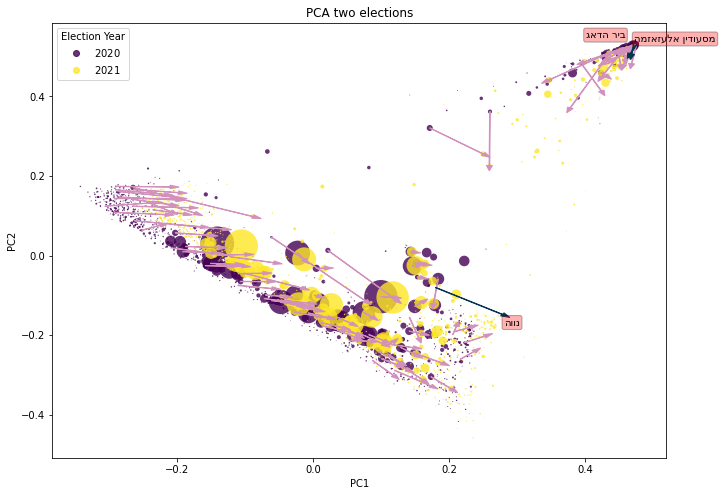

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

scatter = ax.scatter(color_df.x, color_df.y, c=year_vec, s=multiplier,alpha=0.8,edgecolors='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA two elections')
legend = ax.legend(*scatter.legend_elements(), title="Election Year")
text_vectors = [(0.40,0.54), (pca_components_2b[704,0],pca_components_2b[704,1]), 
                (pca_components_2b[780,0]+0.1,pca_components_2b[780,1]-0.1)]

index_list = [index for index, value in enumerate(list(df_2020_raw['בזב'])) if value >10000]
for i in index_list:
  d_x = pca_components_2b[i+1211,0] - pca_components_2b[i,0]
  d_y = pca_components_2b[i+1211,1] - pca_components_2b[i,1]
  plt.arrow(pca_components_2b[i,0],pca_components_2b[i,1],d_x,d_y,head_width = 0.009 ,color='#D291BC'   )

index_list_3 = [index for index, value in enumerate(list(df_2020Bnew.T)) if value in top_3_cities]


for i, j in zip(index_list_3, text_vectors):
  d_x = pca_components_2b[i+1211,0] - pca_components_2b[i,0]
  d_y = pca_components_2b[i+1211,1] - pca_components_2b[i,1]
  plt.arrow(pca_components_2b[i,0],pca_components_2b[i,1],d_x,d_y,head_width = 0.009, color='#023553', label = i  )
  city = resultsper.iloc[i].name
  # print(city[::-1])
  ax.annotate(city[::-1], xy= (j[0], j[1]), textcoords='offset pixels'
  , va='bottom',bbox=dict(boxstyle='round,pad=0.2', fc='red', alpha=0.3))

# ax.annotate()

In [47]:
index_list_3

[141, 704, 780]

In [48]:
parties_dict_6_2D ={'אמת': 'עבודה',
 'ב': 'ימינה',
 'ג': 'יהדות התורה',
 'ודעם': 'הרשימה המשותפת',
 'ט': 'הציונות הדתית',
 'כן': 'כחול לבן',
 'ל': 'ישראל ביתנו',
 'מחל': 'הליכוד',
 'מרצ': 'מרצ',
 'עם': 'רעם',
 'פה': 'יש עתיד',
 'שס': 'שס',
 'ת': 'תקוה חדשה'}

In [49]:
parties_oragnaized= []
for i in names_for_6:
  parties_oragnaized.append(parties_dict[i])  


In [50]:
def party_bar(city, cityA, cityB):
    width = 0.3  # set column width 
    n = 13  # number of parties
    names = parties_oragnaized#adapt to full name
    
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()
    fig.set_size_inches(11, 8)
    cityA_votes = cityA
    cityB_votes = cityB
    cityA_bar = ax.bar(np.arange(n), list(cityA_votes), width, color='r',label = "2020")
    cityB_bar = ax.bar(np.arange(n)+width, list(cityB_votes), width, color='b',label = "2021")

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party in city ' +  city[::-1] + ' 2020 vs 2021')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation = 45)
    plt.legend()
    # ax.legend((cityA_bar[0], cityB_bar[0]), (cityB[::-1], cityA[::-1]))
    plt.show()

    return fig, ax

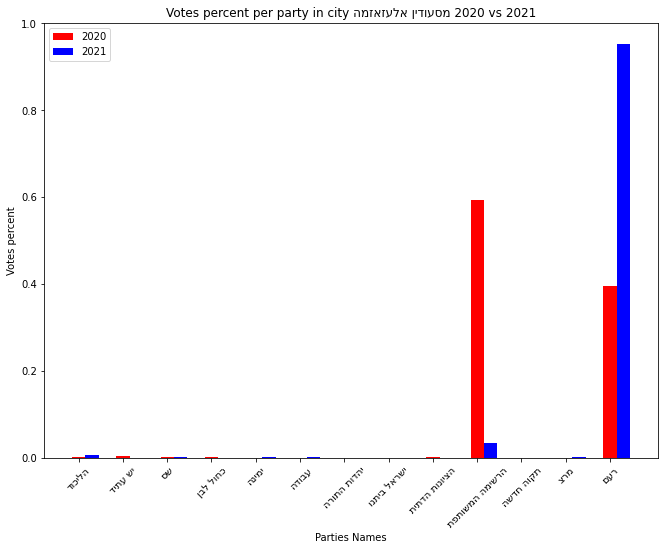

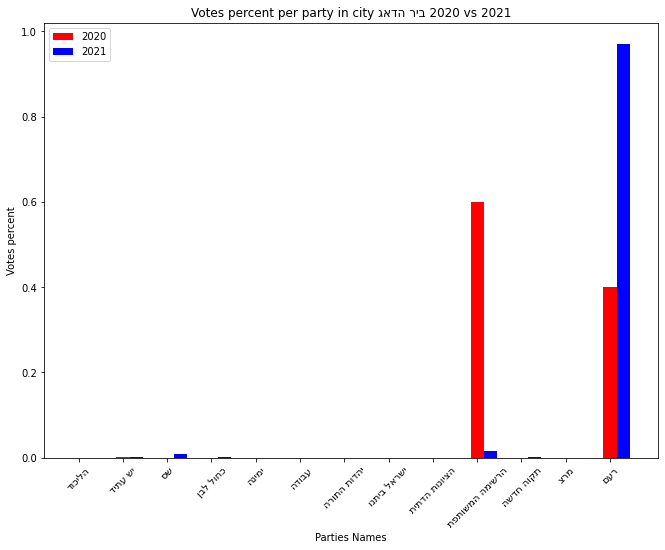

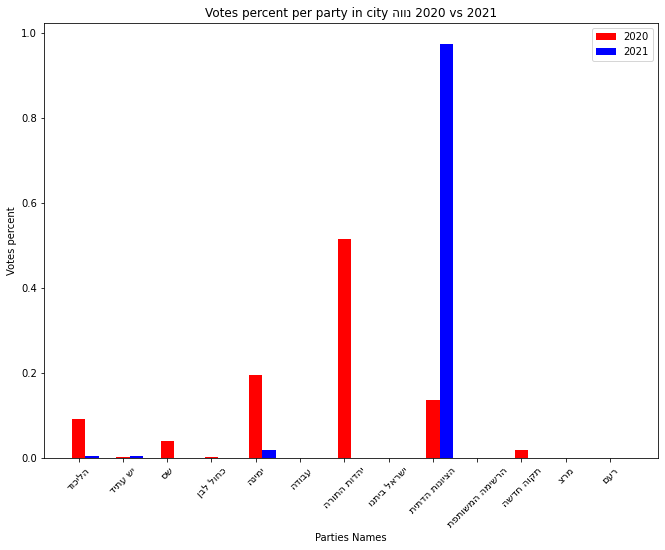

In [51]:
for city in top_3_cities:
  cities = resultsper.loc[city]
  party_bar(city,cities.iloc[0],cities.iloc[1])

Main changes in each of the 3 cities with highest change between elections.

1)  מסעודין אלעזאזמה- the red bars represent 2020 election. then, there was only one arab party. we split the percentge between them (60-40). in the graph we can see that we in this town, we split it incorrectly, and the new arab party got allmost of the votes.
Main differnce- from המשותפת to רע"מ.

2)ביר הדאג- same explanation to 1.

3)Also in this town, we can see that the change in the structure of the parties changes to distrubution of votes.
הציונות הדתית that was in 2020 election in a different formation, received in 2021 allmost all of the votes in this town(98%). these votes in 2020 went to several other parties, mainly ימינה, יהדות התורה.